POSTTEST 5

Nama : Millania Zahroh
nim : 2009106140

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

RECORD FILE

In [2]:
df = pd.read_csv('Spotify_BTS_AudioFeatures.csv')
df.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


DESKRIPSI DATA

In [3]:
df.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,74.000000,0.623694,0.764952,5.496599,-4.722925,0.557823,0.126732,0.100483,0.000039,0.192664,0.541850,121.318429,231753.482993
std,42.579338,0.107888,0.139623,3.596753,1.669454,0.498343,0.119278,0.137320,0.000267,0.147387,0.189324,27.691180,33883.465470
min,1.000000,0.328000,0.271000,0.000000,-13.135000,0.000000,0.027600,0.000216,0.000000,0.039800,0.141000,72.230000,114133.000000
25%,37.500000,0.558000,0.690500,2.000000,-5.539500,0.000000,0.049700,0.009925,0.000000,0.090500,0.387000,99.964500,212673.500000
50%,74.000000,0.614000,0.798000,6.000000,-4.677000,1.000000,0.086800,0.036700,0.000000,0.129000,0.541000,114.044000,231493.000000
75%,110.500000,0.705500,0.868500,9.000000,-3.535000,1.000000,0.152500,0.149000,0.000000,0.287500,0.678000,139.997000,247873.500000
max,147.000000,0.890000,0.992000,11.000000,-0.951000,1.000000,0.884000,0.864000,0.002850,0.923000,0.931000,190.211000,352133.000000


In [4]:
df.corr()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Unnamed: 0,1.000000,0.119152,-0.468932,0.118294,-0.447018,0.062944,-0.220713,0.156218,-0.020873,-0.066434,-0.205809,-0.066531,-0.305422
danceability,0.119152,1.000000,-0.064324,-0.102456,-0.008089,-0.018841,-0.154471,-0.143973,0.214988,-0.143137,0.389867,-0.090056,-0.256894
energy,-0.468932,-0.064324,1.000000,0.076248,0.762589,0.036216,0.109944,-0.493918,-0.234238,0.049519,0.388754,0.129332,0.237430
key,0.118294,-0.102456,0.076248,1.000000,-0.025352,-0.060075,0.084251,-0.043577,-0.080842,-0.006685,-0.027460,0.089775,0.027589
loudness,-0.447018,-0.008089,0.762589,-0.025352,1.000000,-0.076533,-0.129128,-0.449292,-0.197967,-0.020525,0.363508,0.026025,0.161966
mode,0.062944,-0.018841,0.036216,-0.060075,-0.076533,1.000000,0.077742,-0.032133,-0.062853,0.055947,-0.044845,0.158494,0.102119
speechiness,-0.220713,-0.154471,0.109944,0.084251,-0.129128,0.077742,1.000000,0.210331,-0.050873,0.361874,0.074222,0.201267,-0.068257
acousticness,0.156218,-0.143973,-0.493918,-0.043577,-0.449292,-0.032133,0.210331,1.000000,0.215350,0.195986,-0.194595,-0.017702,0.026735
instrumentalness,-0.020873,0.214988,-0.234238,-0.080842,-0.197967,-0.062853,-0.050873,0.215350,1.000000,-0.080995,-0.090031,-0.053230,-0.092201
liveness,-0.066434,-0.143137,0.049519,-0.006685,-0.020525,0.055947,0.361874,0.195986,-0.080995,1.000000,0.015077,-0.112861,-0.085274


INFORMASI

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        147 non-null    int64  
 1   Title             147 non-null    object 
 2   Artist            147 non-null    object 
 3   Release           147 non-null    object 
 4   danceability      147 non-null    float64
 5   energy            147 non-null    float64
 6   key               147 non-null    int64  
 7   loudness          147 non-null    float64
 8   mode              147 non-null    int64  
 9   speechiness       147 non-null    float64
 10  acousticness      147 non-null    float64
 11  instrumentalness  147 non-null    float64
 12  liveness          147 non-null    float64
 13  valence           147 non-null    float64
 14  tempo             147 non-null    float64
 15  id                147 non-null    object 
 16  duration_ms       147 non-null    int64  
dt

In [6]:
df.isna().sum()

Unnamed: 0          0
Title               0
Artist              0
Release             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
dtype: int64

In [30]:
data = df[['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms' ]]

In [31]:
data_train, data_test = train_test_split(data,test_size=1)

In [32]:
len(data)

147

EDA

<Figure size 500x1000 with 0 Axes>

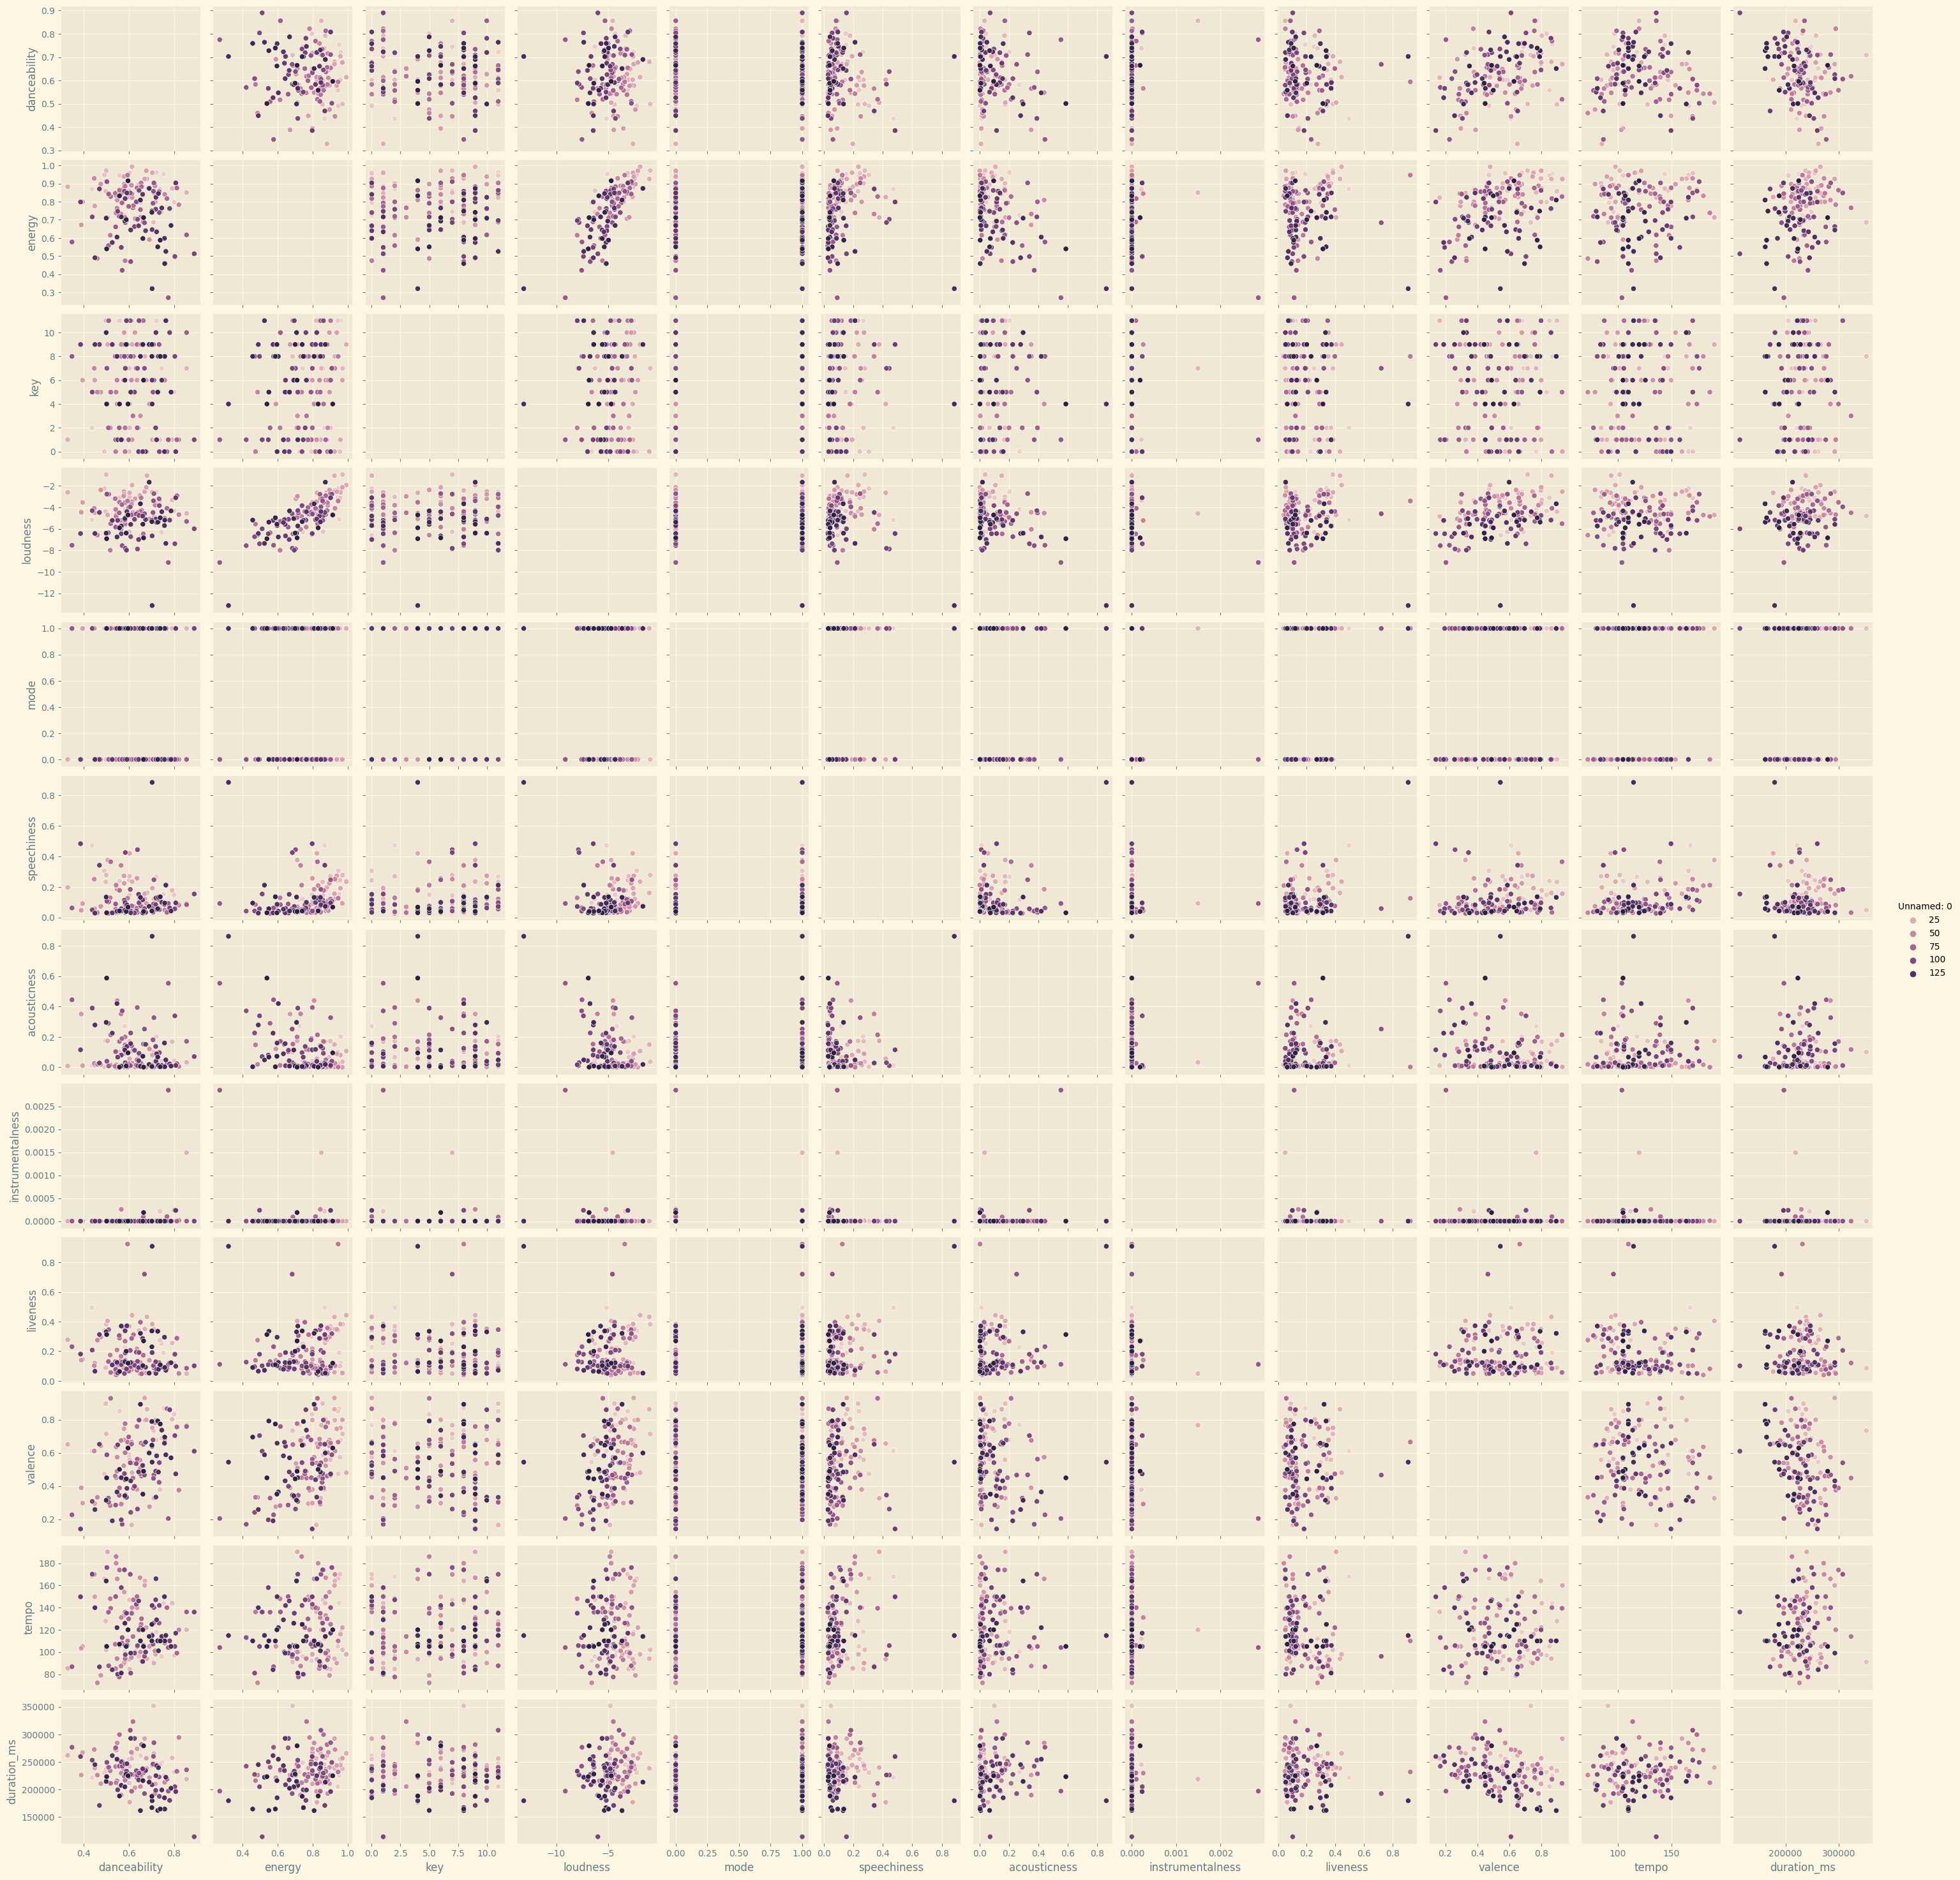

In [28]:
plt.figure(figsize=(5,10))
sns.pairplot(df,hue="Unnamed: 0")
plt.show()

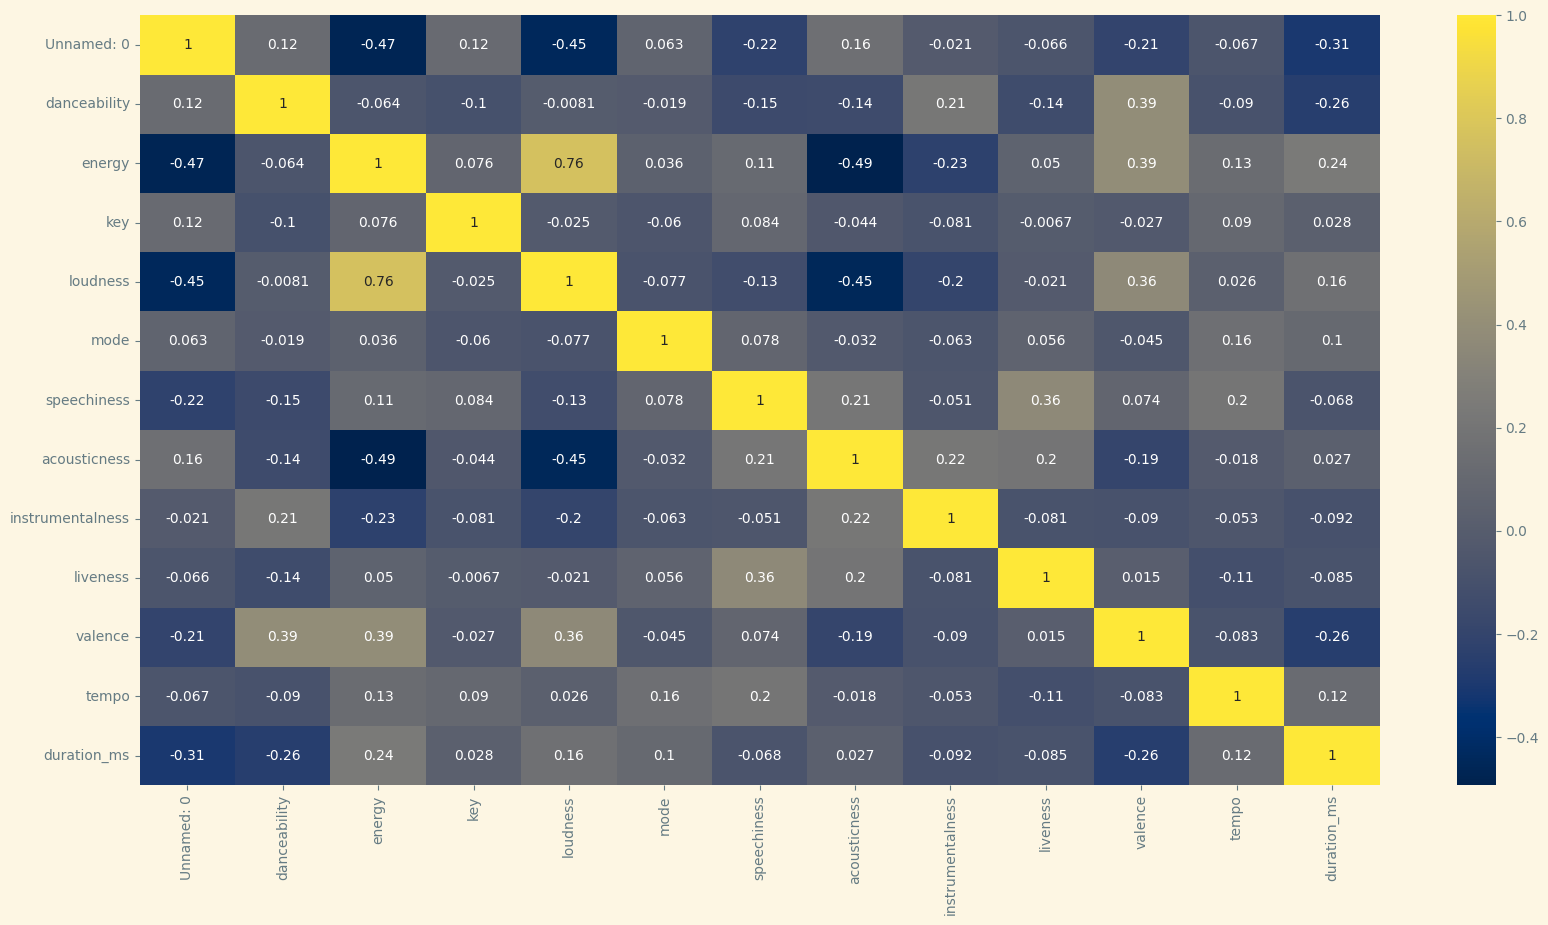

In [27]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),cmap='cividis',annot=True,annot_kws={"size":10})
plt.show()

KLASIFIKASI DATA - SPLIT DATA

In [33]:
data = df[['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms' ]]
label = df[['Unnamed: 0']]

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.2)

KNN Classifier

In [51]:
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(data_train,label_train)


In [46]:
#naive bayes
classifier = GaussianNB()

In [52]:
classifier.fit(data_train, label_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [42]:
predicted_label = knn.predict(data_test)


In [53]:
predicted_label = classifier.predict(data_test)

In [54]:
akurasi = accuracy_score(label_test, predict_label)

In [55]:
print(f'hasil prediksi : {predicted_label}',
      f'label : {label_test}',
      f'akurasi : {akurasi}',
      sep='\n'
     )

hasil prediksi : [61 27 31  3  7 43 31 27  5 11 20  4 11 18 24 22 51  4 18 44 93 18 43 38
 43 24 20  7 27  7]
label :      Unnamed: 0
59           60
141         142
67           68
118         119
35           36
86           87
53           54
111         112
110         111
133         134
11           12
120         121
57           58
31           32
36           37
46           47
55           56
106         107
117         118
14           15
54           55
41           42
116         117
48           49
49           50
18           19
16           17
129         130
135         136
44           45
akurasi : 0.0


In [56]:
len(data)

147

In [57]:
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

DecisionTreeClassifier()

In [58]:
predict_label = dt.predict(data_test)

In [59]:
akurasi = accuracy_score(label_test, predict_label)

In [60]:
print("Akurasi algoritma Decision Tree dengan default paramater :", {akurasi})

Akurasi algoritma Decision Tree dengan default paramater : {0.0}


In [61]:
print(f'hasil prediksi : {predicted_label}',
      f'label : {label_test}',
      f'akurasi : {akurasi}',
      sep='\n'
     )

hasil prediksi : [61 27 31  3  7 43 31 27  5 11 20  4 11 18 24 22 51  4 18 44 93 18 43 38
 43 24 20  7 27  7]
label :      Unnamed: 0
59           60
141         142
67           68
118         119
35           36
86           87
53           54
111         112
110         111
133         134
11           12
120         121
57           58
31           32
36           37
46           47
55           56
106         107
117         118
14           15
54           55
41           42
116         117
48           49
49           50
18           19
16           17
129         130
135         136
44           45
akurasi : 0.0


NAIVE BAYES

In [62]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [63]:
predict_label = gnb.predict(data_test)

In [64]:
akurasi = accuracy_score(label_test, predict_label)

In [66]:
print("Akurasi Naive Bayes dengan default paramater :", {akurasi})

Akurasi Naive Bayes dengan default paramater : {0.0}


REGRESI-SPLIT DATA

In [67]:
data, label = datasets.load_diabetes(return_X_y=True)
data = data[:, np.newaxis, 2]

data_train2 = data[:-50]
data_test2 = data[-50:]

label_train2 = label[:-50]
label_test2 = label[-50:]

Linear-Regression

In [68]:
reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

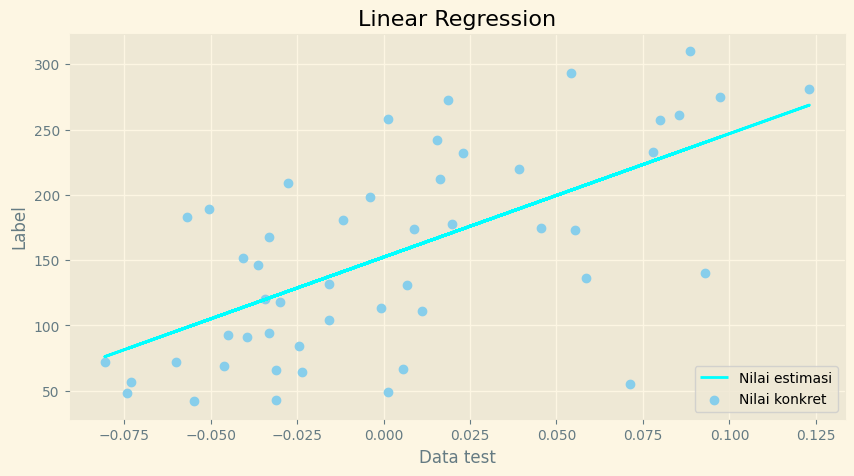

In [74]:
predict_label = reg.predict(data_test2)

plt.figure(figsize=(10,5))

plt.scatter(data_test2, label_test2, color="Skyblue",label="Nilai konkret")
plt.plot(data_test2, predict_label, color="aqua",label="Nilai estimasi")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='lower right')
plt.show()